<a href="https://colab.research.google.com/github/ruperty/colab/blob/master/learning_cartpole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Next step only for colab

# Cartpole Reorganisation

Two previous demos ([Basic Cartpole](https://colab.research.google.com/github/ruperty/colab/blob/master/basic_cartpole.ipynb) , [Moving Cartpole](https://colab.research.google.com/github/ruperty/colab/blob/master/moving_cartpole.ipynb)) showed how the Cartpole scenario could be controlled and moved around with a simple hierarchy of about 4 or 5 levels. Each level has a single weight (gain) value which governs the performance of the control system.

Previously those weights were chosen by hand, so may not necessarily be the best. This current demo shows how those weights can be automatically optimised by a process of reorganisation (learning). In this case, reorganisation means changing the weight values based upon the global error within the system to improve performance. The global error encapsulates all the errors within each control system in the hierarchy. The lower this error then the more stable is the control of the Cartpole. 

As explained in the Advanced section, in this demo, this is achieved by implementing a PCT hierarchy within Tensorflow, the Deep Learning framework.

However, before going in to details let's first see it running. 

# Imports
If you were to run this demo in your own desktop Python environment you would be able to see the Cartpole run live. However, due to the limitations of the online system it is necessary to create a video of the Cartpole environment and run that after the event. 

So, to support that we need these first two cells, which would not be required in your local environment.

In [1]:
# install of utilities to display openai environment in video
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!apt-get install x11-utils  > /dev/null 2>&1

In [2]:
#import sys
from gym.wrappers import Monitor
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start() 

You would need these two, to import some standard libraries and my own functions.

In [3]:
# install of my own pct library
!git clone https://github.com/ruperty/pct.git

Cloning into 'pct'...
remote: Enumerating objects: 430, done.
remote: Counting objects: 100% (430/430), done.
remote: Compressing objects: 100% (305/305), done.
remote: Total 430 (delta 255), reused 287 (delta 115), pack-reused 0
Receiving objects: 100% (430/430), 98.14 KiB | 8.18 MiB/s, done.
Resolving deltas: 100% (255/255), done.


In [4]:
import plotly.graph_objects as go
import pct.openai.cpplots as cp
from pct.dl.models.cartpole import CartpoleTuning

A few settings.

In [5]:
training=True
#render_gym=True
batch_size=10
num_runs=2000
learning_rate=0.0005

# initial weights/gains
weights=[4,       1.8,       1.5,       -0.05]

Create the Cartpole hierarchy. See Advanced section for visualisation of the (Tensorflow) model. 

In [6]:
ct = CartpoleTuning( env_name="CartPole-v1", video_wrap=True)
env = ct.get_env()
obs = env.reset()
print("Initial inputs pole angle, pole velocity, cart position, cart velocity", obs)

Initial inputs pole angle, pole velocity, cart position, cart velocity [-0.04206233 -0.04132169  0.04349708  0.02118808]


Configure the learning aspects of the model. This uses an optimisation algorithm called RMSProp and a "loss" function, which in this case is the root of the sum of the squares of the errors (rsuse).  That is, squaring each of the four errors adding them up and then taking the square root. The loss value actually used for optimisation is the moving average of the loss. 

In [7]:
ct.configure(weights=weights, opt_type="rmsprop", learning_rate=learning_rate, loss_type="rsuse",  loss_smooth=0.9, print=200, num_runs=num_runs)
ct.display_configure()

That's all the set up, now run the system and see the training reorganise the weights of the Cartpole model to optimise the control.

In [8]:
out = ct.run( batch_size, training) 

                                   Weights 
Step  Loss    pole_angle pole_velocity cart_position cart_velocity  
 200  0.532      4.017        1.718        1.418        -0.050       
 400  0.547      4.042        1.637        1.337        -0.050       
 600  0.554      4.064        1.556        1.256        -0.050       
 800  0.449      4.085        1.476        1.177        -0.050       
1000  0.530      4.109        1.395        1.095        -0.050       
1200  0.597      4.129        1.314        1.015        -0.050       
1400  0.502      4.139        1.232        0.935        -0.050       
1600  0.516      4.148        1.151        0.857        -0.050       
Cartpole failed with a poleangle of 13.94 degrees and global error of 2.68.
An optimised control system for this case would have residual error of around 0.20 or less


Watch the video.

In [14]:
#import pct.openai.video  as vid
#vid.show_video()
ct.show_video()

Now plot the global error over the period of the Cartpole run.

In [10]:
import numpy as np
data = ct.get_error_data()
data = [data[0], np.clip(data[1], 0, 1)]
cp.scatter_plot(data , "Global Error", "Time", "Error")

As you can see the error has reduced somewhat, to improve control. However, not by that much. Also, as you probably noticed, the system fails towards the end of the run as the error goes off the scale. 

The reasons for both of these are explained in the next section when you look at the 3D visualisation of the landscape of the error based on the weight values.  

# Advanced


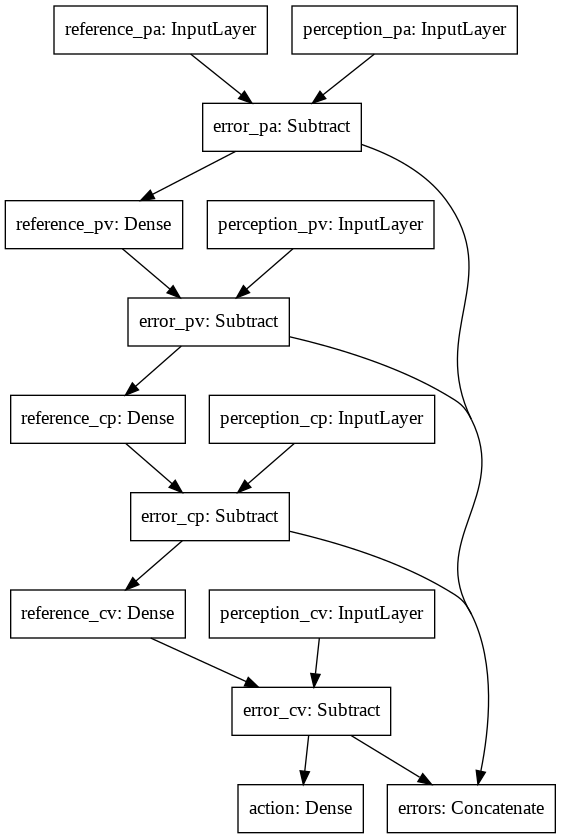

In [11]:
filename = "model.png"
ct.plot_model(filename)
from IPython.display import Image, display
Image(filename)

In [12]:
ct.close()       

In [13]:


cp.load_3d_landscape("pct/data/data-papv-[[00.0][08.0]-[00.5][02.0]]-cp-1.5.npy", 1)